### James Griffin 
#### 501 R 
#### SEIR model with grpahs 
##### homework 5 



In [17]:
## Importing packages 
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random
import itertools
import networkx as nx
from itertools import combinations, groupby

!pip install seirsplus
from seirsplus.models import *
from seirsplus.networks import *

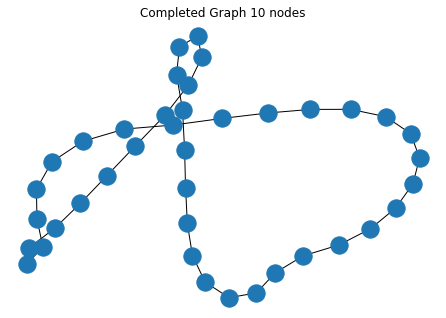

this is the Radius for our Completed Graph 40 Nodes
20
this is the diameter of our Completed Graph 40 Nodes
20


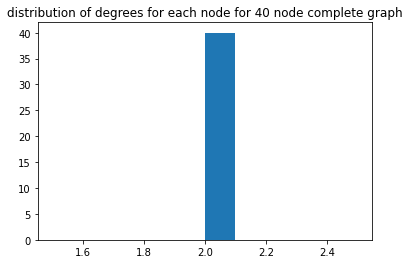

In [81]:
G_ex = nx.Graph() 

G_ex = nx.cycle_graph(40)

nx.draw(G_ex)
plt.title("Completed Graph 10 nodes")
plt.show()
print("this is the Radius for our Completed Graph 40 Nodes")
print(nx.radius(G_ex))
print("this is the diameter of our Completed Graph 40 Nodes")
print(nx.diameter(G_ex))

plt.hist(dict(nx.degree(G_ex)).values())
plt.title("distribution of degrees for each node for 40 node complete graph")
plt.show()

## just looking at a graph that we're working on 

In [21]:
first = list(G_ex.nodes)[0]
first
#G_ex.adjacency
A = nx.adjacency_matrix(G_ex)
#print(A[39])

a = pd.DataFrame(A)
A[0]

<1x40 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [74]:
#The goal of this lab is to introduce a graphical model to the SEIR model
#coded earlier in the semester 

#copying code over from that lab 

# Just like the last homework except adding a few extra variables 
#this is programming the exposed compartment of the model
def seir_model(sim, t, N, beta, gamma, delta):
    ''' function takes into a simulation state, a time, number of people and 
    then parameters for E, beta and gamma as defined in class '''

    S, E, I, R = sim
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I

    return dSdt, dEdt, dIdt, dRdt

#So we will build a function for simulating the model 
def sim_model(cycle = True, complete = False):
    #number of people suceptable will be random 
    suceptable = 40
    #and we will start with a pre set number of people infected 
    inf = 1 #starting off with one infected person,  in the graphical model it 
            #wont mater who it is, because they are either cycles or completed graphs

    #and we start with a recovered population of 0 
    recov = 0 
    
    #modeling the first year 
    days = range(0,100)

    #creating a number of contacts each person comes in contact with while sick
    #contacts = np.arange(5,  55, 10)
    #and infection probabilities for household, and I'm gonna define the household as 
    #whoever the node is connected to -- probability from slides 
    inf_prob = .038

    #and the recovery rate will be the same 
    recov_rate = [.001, .05, .1, .5]
    #recov_rate = .986

    set_infected = []
    set_exposed = []
    set_recovered = []

    if cycle == True:
        #incubation period, when the person is contagous 
        inc_period = np.random.lognormal(mean = 2.25, sigma = .105, size = 1)
        #then for each person they are only connected to the two people
        #to their immediate right or left
        contacts = 2
        for i in range(40):
            if i == 0:
                #infected
                who_contacted = [1, 39, None]
                add = np.random.choice(who_contacted, 2,
                                        p=[inf_prob, inf_prob, .924])
                add = list(set(list(add)))
                for j in range(len(add)):
                    if add[j] != None:
                        set_infected.append(add[j])
                    #exposed
                set_exposed.append(who_contacted[0]) 
                set_exposed.append(who_contacted[1])
                    #recovered 

            elif i == 39:
                who_contacted = [38, 1, None]
                add = np.random.choice(who_contacted, 2,
                                        p=[inf_prob, inf_prob, .924])
                add = list(set(list(add)))
                for j in range(len(add)):
                    if add[j] != None:
                        set_infected.append(add[j])
                    #exposed
                set_exposed.append(who_contacted[0]) 
                set_exposed.append(who_contacted[1])
                    #recovered 

            else:
                who_contacted = [i-1, i+1, None,]
                add = np.random.choice(who_contacted, 2,
                                            p=[inf_prob, inf_prob, .924])
         
                add = np.random.choice(who_contacted, 2,
                                        p=[inf_prob, inf_prob, .924])
                add = list(set(list(add)))
                for j in range(len(add)):
                    if add[j] != None:
                        set_infected.append(add[j])
                    #exposed
                set_exposed.append(who_contacted[0]) 
                set_exposed.append(who_contacted[1])
                    #recovered 
        set_infected = set(set_infected)

    
    if complete == True:
        #incubation period, when the person is contagous 
        inc_period = np.random.lognormal(mean = 2.25, sigma = .105, size = 1)
        #then for each person they are only connected to the two people
        #to their immediate right or left
        contacts = 39
        for i in range(40):
            #print(i)
            if i == 0:
                #infected
                who_contacted = list(range(1, 40))
                who_contacted.append(None)
                probs = [1/40]*40
                #print(probs)
                add = np.random.choice(who_contacted, 4,
                                        p=probs)
                add = list(set(list(add)))
                #print(add)
                for j in range(len(add)):
                    if add[j] != None:
                        set_infected.append(add[j])
                    #exposed
                who_contacted.pop()
                for k in range(len(who_contacted)):
                    set_exposed.append(who_contacted[k])
                    #recovered 

            elif i == 39:
                who_contacted = list(range(0, 39))
                who_contacted.append(None)
                probs = [1/40] * 40
                add = np.random.choice(who_contacted, 4,
                                        p=probs)
                add = list(set(list(add)))
                for j in range(len(add)):
                    if add[j] != None:
                        set_infected.append(add[j])
                    #exposed
                who_contacted.pop()
                for k in range(len(who_contacted)):
                    set_exposed.append(who_contacted[k])

            else:
                who_contacted = list(range(0, 40))
                who_contacted = set(who_contacted) - set([i])
                who_contacted = list(who_contacted)
                #print(who_contacted)
                who_contacted.append(None)

                probs = [1/40] * 40
                add = np.random.choice(who_contacted, 4,
                                        p=probs)
                #print(add)
                add = list(set(list(add)))
                for j in range(len(add)):
                    if add[j] != None:
                        set_infected.append(add[j])
                    #exposed
                who_contacted.pop()
                for k in range(len(who_contacted)):
                    set_exposed.append(who_contacted[k])
        set_infected = set(set_infected) - set([1])
        #print(set_infected)
        
        
    exposed = len(set(set_exposed))
    S = 40 #- inf+len(set(set_infected))   
    E = exposed
    I = inf+len(set(set_infected))
    R = random.choice(recov_rate)
    N = 40 #S+I+R+E
        #print(N)
    beta =  0.0536
    gamma = R
    delta = random.choice(inc_period)
    #print([S,I,R])
    ret = odeint(seir_model, [S,E,I,R], days, args = (N, beta,  gamma, delta))
    S_, E_, I_, R_ = ret.T

        #making plots all nice 
    textstr = 'seir model  simulation'+ "\n"
    textstr += "Susceptable: "+str(S)+'\n'
    textstr += "Infected: "+str(I)+'\n'
    textstr += "Recovered: "+str(R)+'\n'
    textstr += "Pop_number: "+str(N)+'\n'
    textstr += "Gamma: "+str(gamma)+'\n'
    textstr += 'Beta: '+str(beta)+'\n'
    textstr += "Delta: "+str(delta)+'\n'
    textstr += "R0: "+str(beta/gamma)+'\n'

    results = pd.DataFrame( 
            {'Susceptable': S_,
             "Exposed": E_,
             'Infected': I_,
             'Recovered': R_,
             'Days':days
            })
        #print(results.head())
    results.plot(x ='Days', y = ['Susceptable', "Exposed", 
                                     "Infected", 'Recovered'], kind = 'area', 
                     stacked = False)
        
    plt.title("SEIR Model")
    plt.text(1, 0.1, textstr, fontsize = 12,
                 transform=plt.gcf().transFigure)
    plt.show()


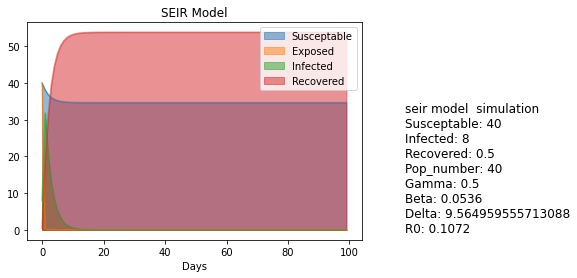

In [80]:
sim_model(cycle = True, complete = False)

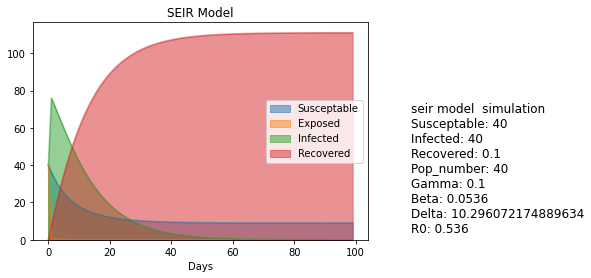

In [79]:
sim_model(cycle = False, complete = True)

Ok, so here are the two graphs that we have. The top is the cycle graph, and the bottom is the conected graph. I think we can basically inturpret the cycle graph as the "socially distanced" graph, where we limit our interactions with other people, while the connected graph is kind of operating like "normal", where we interact with more people. We can see that the populations of susceptable people steadily decreases with the "interact with everybody" graph, because as more nad more people get it, less and less become suceptable, where in the top graph, the number of infected people is really low, so the susceptable population essentially holds constant. 

I wasn't totally sure on what infection rates to use, I thought we were supposed to use the 0.038 from the slides - if we did have higher infection rates, then it would be more likely that the disease would spread faster through the populations. It already hits everyone in the completed graph, but it would be even faster, and would hit more people in the socially distanced cycle graph. 